In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
deliveries_data = pd.read_csv(r"C:\Users\Navneet\Desktop\Data Analyst Projects\IPL Data Analytics/IPL Ball-by-Ball 2008-2020.csv")
match_data = pd.read_csv(r"C:\Users\Navneet\Desktop\Data Analyst Projects\IPL Data Analytics/IPL Matches 2008-2020.csv")

In [3]:
match_data.head(4)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper


In [4]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

## 1 ) Some basic analysis :

#### Total Matches Played : 

In [5]:
match_data.shape

(816, 17)

In [6]:
type(match_data.shape)

tuple

In [7]:
match_data.shape[0]

816

#### Venues Played At :  

In [8]:
match_data["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

#### Total teams participated : 

In [9]:
match_data["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

#### Maximum Toss Winner Teams : 

In [10]:
match_data["toss_winner"].value_counts()

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [11]:
match_data["toss_winner"].value_counts().index[0]

'Mumbai Indians'

#### Most Player of the match : 

In [12]:
match_data["player_of_match"].value_counts().index[0]

'AB de Villiers'

## 2) Particular batsman analysis :
        Lets do in-depth analysis for 'V Kohli' which is an Indian cricketer !

In [13]:
deliveries_data["batsman"].unique()

array(['RT Ponting', 'BB McCullum', 'DJ Hussey', 'Mohammad Hafeez',
       'SC Ganguly', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'W Jaffer', 'JH Kallis',
       'R Dravid', 'V Kohli', 'K Goel', 'MEK Hussey', 'JR Hopes',
       'SK Raina', 'JDP Oram', 'S Badrinath', 'PA Patel', 'ML Hayden',
       'MS Dhoni', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'S Dhawan', 'G Gambhir',
       'SK Warne', 'D Salunkhe', 'SK Trivedi', 'V Sehwag', 'SR Watson',
       'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'WP Saha', 'AS Yadav', 'A Symonds', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'AC Gilchrist', 'Y Venugopal Rao',
       'VVS Laxman', 'RG Sharma', 'SB Styris', 'LR Shukla', 'PP Chawla',
       'Kamran Akmal', 'DPMD Jayawardene'

In [14]:
filt = deliveries_data["batsman"] == "V Kohli"

In [15]:
df_kohli = deliveries_data[filt]

In [16]:
df_kohli.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [17]:
df_kohli["dismissal_kind"].value_counts()

dismissal_kind
caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: count, dtype: int64

In [18]:
df_kohli["batsman_runs"].unique()

array([0, 1, 4, 6, 2, 3])

In [19]:
len(df_kohli[df_kohli["batsman_runs"]==1])

1919

In [20]:
len(df_kohli[df_kohli["batsman_runs"]==2])*2

692

In [21]:
len(df_kohli[df_kohli["batsman_runs"]==3])*3

39

In [22]:
len(df_kohli[df_kohli["batsman_runs"]==4])*4

2016

In [23]:
len(df_kohli[df_kohli["batsman_runs"]==6])*6

1212

In [24]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

In [25]:
values = [1919, 692, 39, 2016, 1212]
labels = [1, 2, 3, 4, 6]

trace = go.Pie(labels= labels, values= values, hole=0.3)

data = [trace]

fig = go.Figure(data = data)

In [26]:
fig.show()

## 3) Toss decision across seasons :

In [27]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [28]:
match_data["Season"] = pd.to_datetime(match_data["date"]).dt.year

In [29]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season'],
      dtype='object')

In [30]:
match_data.groupby(["Season", "toss_decision"]).size()

Season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
dtype: int64

In [31]:
type(match_data.groupby(["Season", "toss_decision"]).size())

pandas.core.series.Series

In [32]:
season_toss_count_df = match_data.groupby(["Season", "toss_decision"]).size().reset_index().rename(columns={0: "count"})

In [33]:
season_toss_count_df

,Season,toss_decision,count
0,2008,bat,26
1,2008,field,32
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


<Axes: xlabel='Season', ylabel='count'>

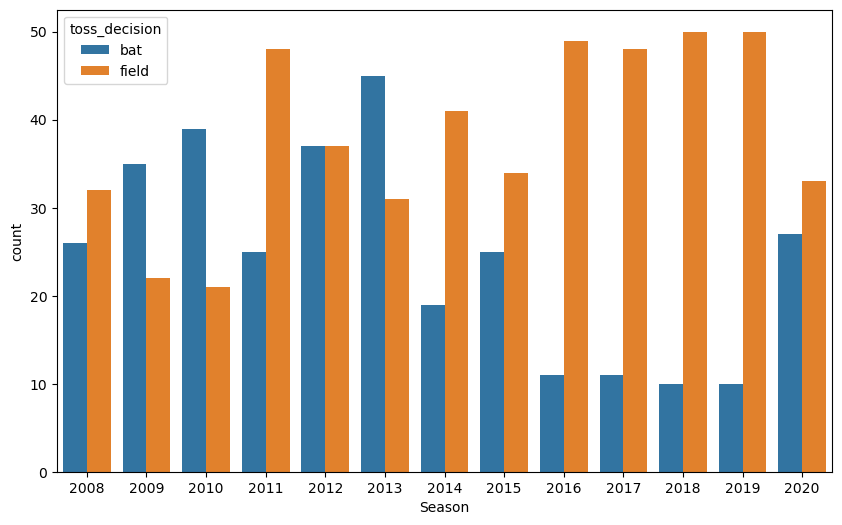

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x="Season", y="count", hue="toss_decision", data=season_toss_count_df)

## 4) Does Winning toss implies winning game ?

In [35]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'Season'],
      dtype='object')

In [36]:
match_data[["team1", "team2", "toss_winner", "winner"]]

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [37]:
match_data["toss_win_game_win"] = np.where(match_data["toss_winner"]==match_data["winner"], "Yes", "No")

In [38]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win_game_win'],
      dtype='object')

In [39]:
match_data["toss_win_game_win"].value_counts()

toss_win_game_win
Yes    418
No     398
Name: count, dtype: int64

In [40]:
match_data["toss_win_game_win"].value_counts().index

Index(['Yes', 'No'], dtype='object', name='toss_win_game_win')

In [41]:
match_data["toss_win_game_win"].value_counts().values

array([418, 398])

In [42]:
labels = match_data["toss_win_game_win"].value_counts().index
values = match_data["toss_win_game_win"].value_counts().values

trace = go.Pie(labels= labels, values= values, hole=0.3)

data = [trace]

fig = go.Figure(data = data)

fig.update_traces(hoverinfo="label+percent", textinfo="label+percent")

In [43]:
fig.show()

## 5) Number of times team have won the tournament :

In [44]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win_game_win'],
      dtype='object')

In [45]:
match_data["Season"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int32)

In [46]:
df_2018 = match_data[match_data["Season"] == 2018]

In [47]:
df_2018

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_win_game_win
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018,Yes
637,1136562,Chandigarh,2018-04-08,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,6.0,N,NaN,KN Ananthapadmanabhan,RJ Tucker,2018,Yes
638,1136563,Kolkata,2018-04-08,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,4.0,N,NaN,C Shamshuddin,A Deshmukh,2018,Yes
639,1136564,Hyderabad,2018-04-09,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,9.0,N,NaN,VA Kulkarni,NJ Llong,2018,Yes
640,1136565,Chennai,2018-04-10,SW Billings,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,CB Gaffaney,AK Chaudhary,2018,Yes
641,1136566,Jaipur,2018-04-11,SV Samson,Sawai Mansingh Stadium,0,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,Rajasthan Royals,runs,10.0,N,D/L,KN Ananthapadmanabhan,Nitin Menon,2018,No
642,1136567,Hyderabad,2018-04-12,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,1.0,N,NaN,NJ Llong,CK Nandan,2018,Yes
643,1136568,Bengaluru,2018-04-13,UT Yadav,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,N,NaN,A Deshmukh,S Ravi,2018,Yes
644,1136569,Mumbai,2018-04-14,JJ Roy,Wankhede Stadium,0,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Delhi Daredevils,wickets,7.0,N,NaN,KN Ananthapadmanabhan,Nitin Menon,2018,Yes
645,1136570,Kolkata,2018-04-14,B Stanlake,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,5.0,N,NaN,AK Chaudhary,A Nand Kishore,2018,Yes


In [48]:
df_2018["winner"].tail(1).values[0]

'Chennai Super Kings'

In [49]:
winners_team = {}

for year in sorted(match_data["Season"].unique()):
    current_yr_df = match_data[match_data["Season"] == year]
    winners_team[year] = current_yr_df["winner"].tail(1).values[0]

In [50]:
winners_team

{np.int32(2008): 'Rajasthan Royals',
 np.int32(2009): 'Deccan Chargers',
 np.int32(2010): 'Chennai Super Kings',
 np.int32(2011): 'Chennai Super Kings',
 np.int32(2012): 'Kolkata Knight Riders',
 np.int32(2013): 'Mumbai Indians',
 np.int32(2014): 'Kolkata Knight Riders',
 np.int32(2015): 'Mumbai Indians',
 np.int32(2016): 'Sunrisers Hyderabad',
 np.int32(2017): 'Mumbai Indians',
 np.int32(2018): 'Chennai Super Kings',
 np.int32(2019): 'Mumbai Indians',
 np.int32(2020): 'Mumbai Indians'}

In [51]:
winners_team.values()

dict_values(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Mumbai Indians', 'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians', 'Mumbai Indians'])

In [52]:
from collections import Counter

In [53]:
Counter(winners_team.values())

Counter({'Mumbai Indians': 5,
         'Chennai Super Kings': 3,
         'Kolkata Knight Riders': 2,
         'Rajasthan Royals': 1,
         'Deccan Chargers': 1,
         'Sunrisers Hyderabad': 1})

## 6) Most number of wins :

In [54]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Season',
       'toss_win_game_win'],
      dtype='object')

In [55]:
match_data[['team1', 'team2']]

,team1,team2
0,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals
3,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers
...,...,...
811,Royal Challengers Bangalore,Mumbai Indians
812,Mumbai Indians,Delhi Capitals
813,Royal Challengers Bangalore,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad


In [56]:
matches_played = match_data["team1"].value_counts() + match_data["team2"].value_counts()

In [57]:
type(matches_played)

pandas.core.series.Series

In [58]:
matches_played_df = matches_played.to_frame().reset_index()

In [59]:
matches_played_df.columns = ["team_name", "matches_played"]

In [60]:
matches_played_df

,team_name,matches_played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


In [61]:
wins = pd.DataFrame(match_data["winner"].value_counts()).reset_index()

In [62]:
wins.columns = ["team_name", "wins"]

In [63]:
wins

,team_name,wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [64]:
played = matches_played_df.merge(wins, on="team_name", how="inner")

In [65]:
played

,team_name,matches_played,wins
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,46,12


In [66]:
trace1 = go.Bar(
    x = played["team_name"],
    y = played["matches_played"],
    name = "total_matches"
)

trace2 = go.Bar(
    x = played["team_name"],
    y = played["wins"],
    name = "matches_won"
)



In [67]:
data = [trace1, trace2]

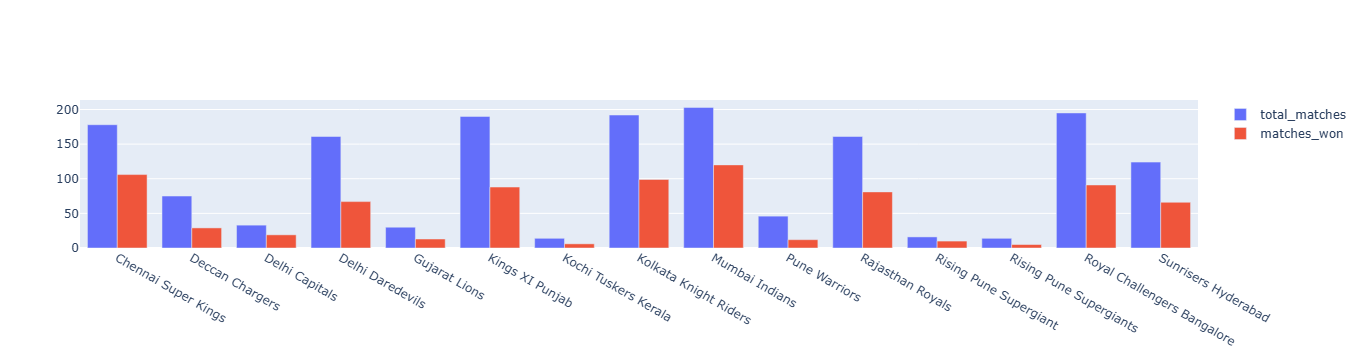

In [68]:
iplot(data)